# Five Lives ML Technical Interview

# Part 1 - Review

Here is an analysis using the FL chain dataset. The task is to build a function from the features
[age, creatine, flc.grp, kappa, lambda, mgus, sample.yr and sex] that outputs the probability that the patient will experience death within ten years.

Read through the section and take notes on how this can be improved. 

We won't be going through the literature.

References
- 1
https://doi.org/10.1016/j.mayocp.2012.03.009
- 2
Dispenzieri, A., Katzmann, J., Kyle, R., Larson, D., Therneau, T., Colby, C., Clark, R., Mead, G., Kumar, S., Melton III, LJ. and Rajkumar, SV. Use of monclonal serum immunoglobulin free light chains to predict overall survival in the general population, Mayo Clinic Proceedings 87:512-523. (2012)



In [1]:
# predict death within 10 years
import pandas as pd

df = pd.read_csv('five_lives_ml_task_data.csv')
df

,age,chapter,creatinine,flc.grp,kappa,lambda,mgus,sample.yr,sex,death,futime
0,97.0,Circulatory,1.7,10,5.700,4.860,no,1997,F,True,85.0
1,92.0,Neoplasms,0.9,1,0.870,0.683,no,2000,F,True,1281.0
2,94.0,Circulatory,1.4,10,4.360,3.850,no,1997,F,True,69.0
3,92.0,Circulatory,1.0,9,2.420,2.220,no,1996,F,True,115.0
4,93.0,Circulatory,1.1,6,1.320,1.690,no,1996,F,True,1039.0
...,...,...,...,...,...,...,...,...,...,...,...
7869,52.0,NaN,1.0,6,1.210,1.610,no,1995,F,False,4997.0
7870,52.0,NaN,0.8,1,0.858,0.581,no,1999,F,False,3652.0
7871,NaN,NaN,NaN,8,1.700,1.720,no,2002,F,False,2507.0
7872,NaN,NaN,NaN,9,1.710,2.690,no,1995,F,False,4982.0


In [2]:
df['futime_years'] = df['futime'] / 365.25
df['y'] = (df['death'] & (df['futime_years'] < 10))
df = df.loc[df['y'] | (~df['death'] & (df['futime_years'] > 10))]
df

,age,chapter,creatinine,flc.grp,kappa,lambda,mgus,sample.yr,sex,death,futime,futime_years,y
0,97.0,Circulatory,1.7,10,5.700,4.860,no,1997,F,True,85.0,0.232717,True
1,92.0,Neoplasms,0.9,1,0.870,0.683,no,2000,F,True,1281.0,3.507187,True
2,94.0,Circulatory,1.4,10,4.360,3.850,no,1997,F,True,69.0,0.188912,True
3,92.0,Circulatory,1.0,9,2.420,2.220,no,1996,F,True,115.0,0.314853,True
4,93.0,Circulatory,1.1,6,1.320,1.690,no,1996,F,True,1039.0,2.844627,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,53.0,NaN,0.8,2,0.705,1.250,no,1997,F,False,4547.0,12.449008,False
7868,52.0,NaN,0.7,2,0.786,1.030,no,1996,F,False,4788.0,13.108830,False
7869,52.0,NaN,1.0,6,1.210,1.610,no,1995,F,False,4997.0,13.681040,False
7872,NaN,NaN,NaN,9,1.710,2.690,no,1995,F,False,4982.0,13.639973,False


In [3]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
obj_cols = ['chapter', 'mgus', 'sex']
df[obj_cols] = ord_enc.fit_transform(df[obj_cols])
df = df.fillna(df.median(), axis=0)
df

/var/folders/xc/q4g_hxnd18dg4lfsbfpd1zxr0000gn/T/ipykernel_31783/4181242838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[obj_cols] = ord_enc.fit_transform(df[obj_cols])


,age,chapter,creatinine,flc.grp,kappa,lambda,mgus,sample.yr,sex,death,futime,futime_years,y
0,97.0,1.0,1.7,10,5.700,4.860,0.0,1997,0.0,True,85.0,0.232717,True
1,92.0,12.0,0.9,1,0.870,0.683,0.0,2000,0.0,True,1281.0,3.507187,True
2,94.0,1.0,1.4,10,4.360,3.850,0.0,1997,0.0,True,69.0,0.188912,True
3,92.0,1.0,1.0,9,2.420,2.220,0.0,1996,0.0,True,115.0,0.314853,True
4,93.0,1.0,1.1,6,1.320,1.690,0.0,1996,0.0,True,1039.0,2.844627,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,53.0,10.0,0.8,2,0.705,1.250,0.0,1997,0.0,False,4547.0,12.449008,False
7868,52.0,10.0,0.7,2,0.786,1.030,0.0,1996,0.0,False,4788.0,13.108830,False
7869,52.0,10.0,1.0,6,1.210,1.610,0.0,1995,0.0,False,4997.0,13.681040,False
7872,64.0,10.0,1.0,9,1.710,2.690,0.0,1995,0.0,False,4982.0,13.639973,False


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split


X = df.drop(columns=['y', 'death', 'futime', 'futime_years', 'chapter'])
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

clf_svc = svm.SVC(random_state=0, probability=True)
clf_svc.fit(X_train, y_train)

clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=0)
clf_rf.fit(X_train, y_train)

clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

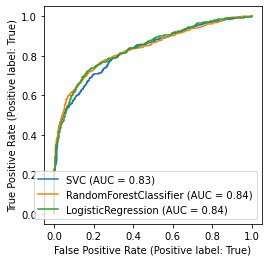

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(clf_svc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(clf_lr, X_test, y_test, ax=ax)
ax.set_aspect('equal')

Best model is RandomForest.

In [6]:
feature_importances = dict(sorted(zip(X.columns, clf_rf.feature_importances_), key=lambda x: x[1], reverse=True))
feature_importances

{'age': 0.3253811562447547,
 'kappa': 0.20418100757709434,
 'lambda': 0.19249692266413784,
 'creatinine': 0.09307847287804126,
 'sample.yr': 0.08284600890095586,
 'flc.grp': 0.08084686921703368,
 'sex': 0.019530764575475278,
 'mgus': 0.001638797942506966}

In [7]:
def probability_of_death_in_ten_years(row: pd.Series) -> float:
    return clf_rf.predict_proba(pd.DataFrame(row).T)[0][1]

<AxesSubplot:ylabel='Count'>

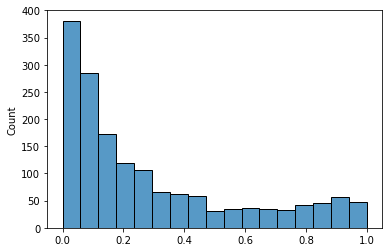

In [8]:
import seaborn as sns

sns.histplot(X_test.apply(probability_of_death_in_ten_years, axis=1))

# Part 2 - Coding Task

The AUCs of both models are identical. Complete the function below to compare the appropriateness of RandomForestClassifier and LogisticRegression for use as an estimated probability of death within ten years. Add notes if you do not have time to complete.

In [9]:
from typing import List
from sklearn.base import ClassifierMixin
from matplotlib.figure import Figure


def assess_models(
    models: List[ClassifierMixin],
    X_test: pd.DataFrame,
    y_test: pd.Series
) -> Figure:
    """ Ouputs a model comparison figure """
    pass

# Part 3 - Problem Discussion

We have a longitudinal dataset for 250,000 patients where 3.5% develop dementia. Each visit collects information on demographics, family history, vitals and genetics. Our goal to build a mobile app that assesses the probability of getting dementia. 

What do you build and how do you know it works?